## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data and Data Analysis

In [506]:
bike=pd.read_csv(r"\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [507]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [508]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [509]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Renaming columns

In [510]:
bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


mapping categorical variables with their subcategories to help with visualization analysis

In [511]:
#mapping categorical variables with their subcategories to help with visualization analysis
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'MistCloudy',3:'LightSnow',4:'SnowFog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [512]:
bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

visualizing the numeric variables of the dataset using pairplot 

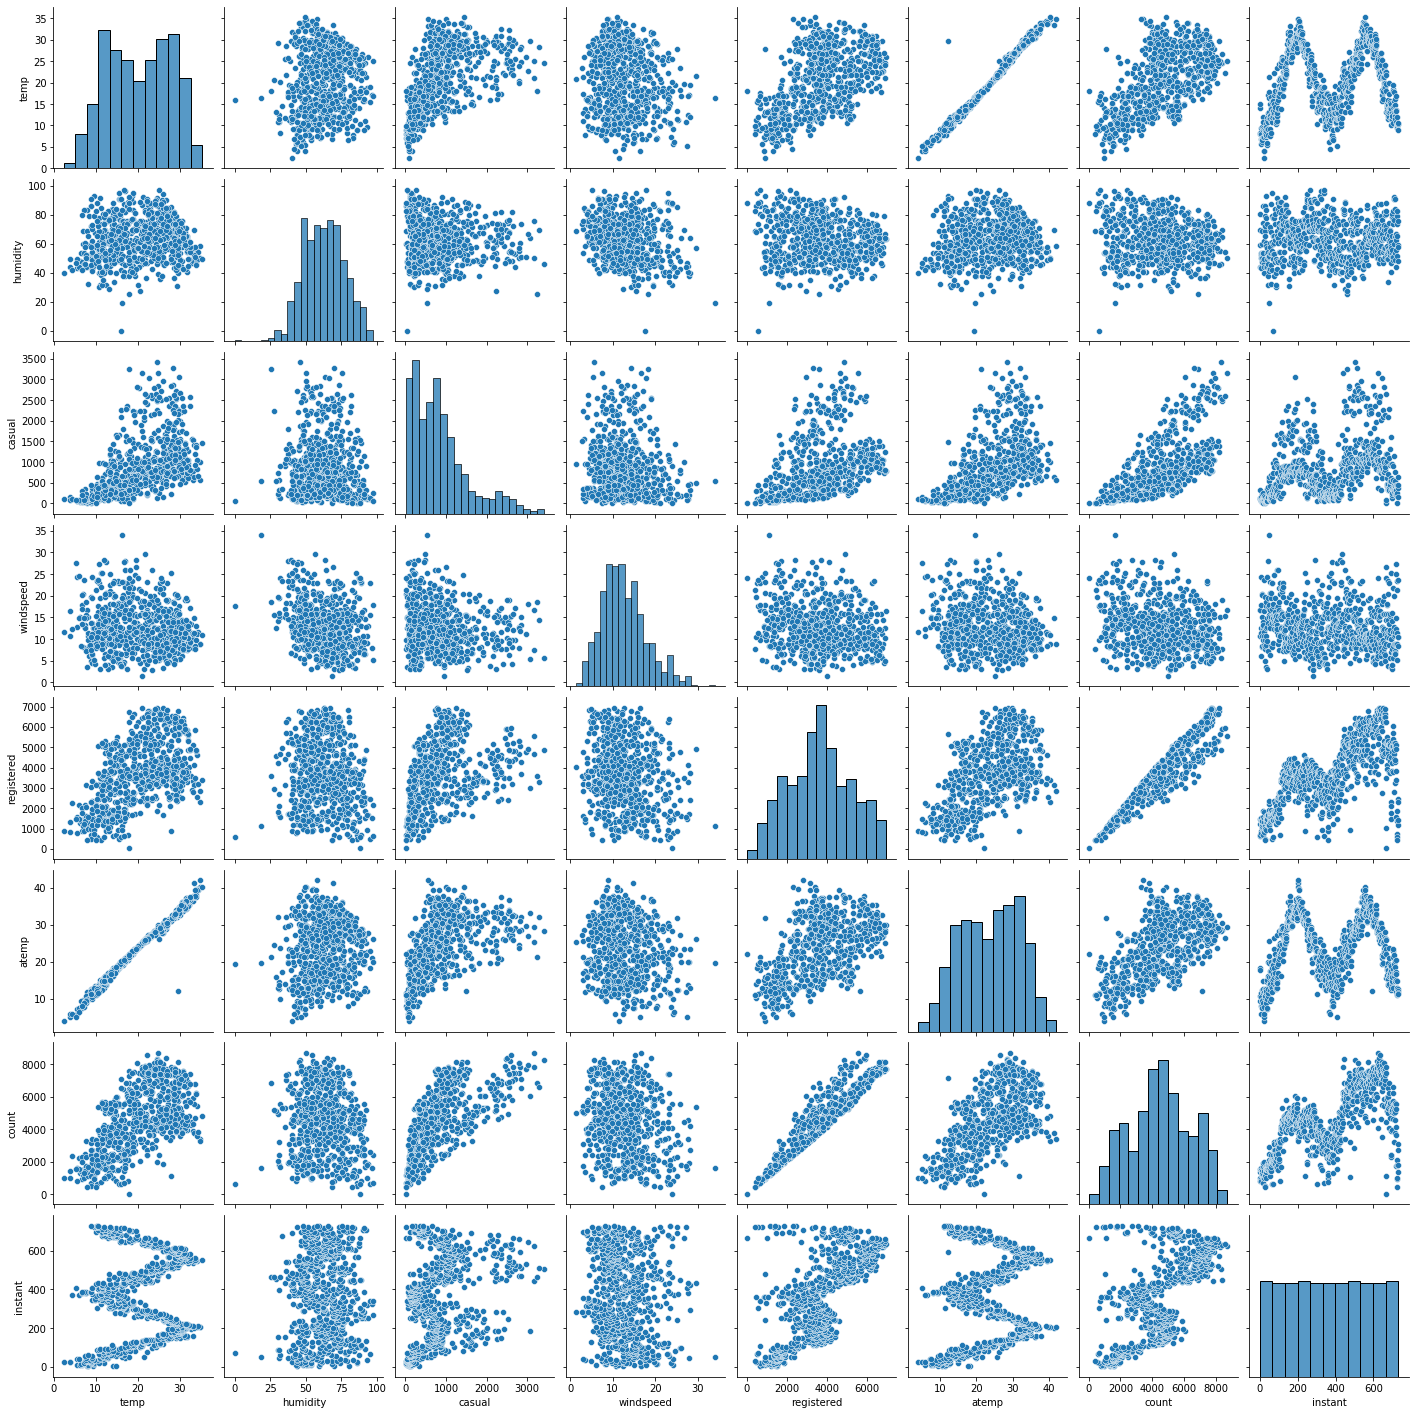

In [513]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

we can see from the graph above, there is some correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further.

Verifying the relationship between registered,casual and count.

In [514]:
bike[bike['registered']+bike['casual']!=bike['count']]

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count


Removing redundant and not required coumns:

In [515]:
#instant is system generated
#registered and casual add up to count values so removing those to reduce multicollinearity
#dteday is being dropped as we already have year,month columns and dteday is redundant
#atemp is getting dropped as we have temp column so atemp is redundant
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


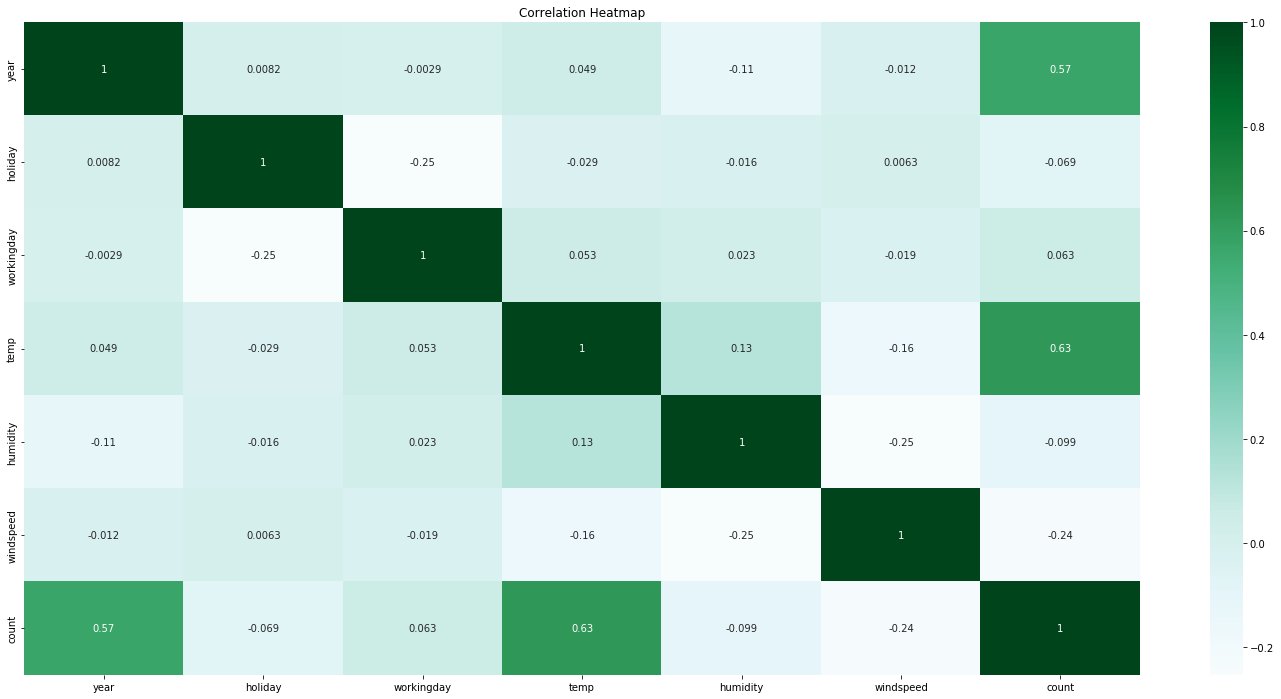

In [516]:
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='BuGn', annot = True)
plt.title("Correlation Heatmap")
plt.show()

generating dummy columns for categorical columns:

In [517]:
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,MistCloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,MistCloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [518]:
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [519]:
bike.shape

(730, 29)

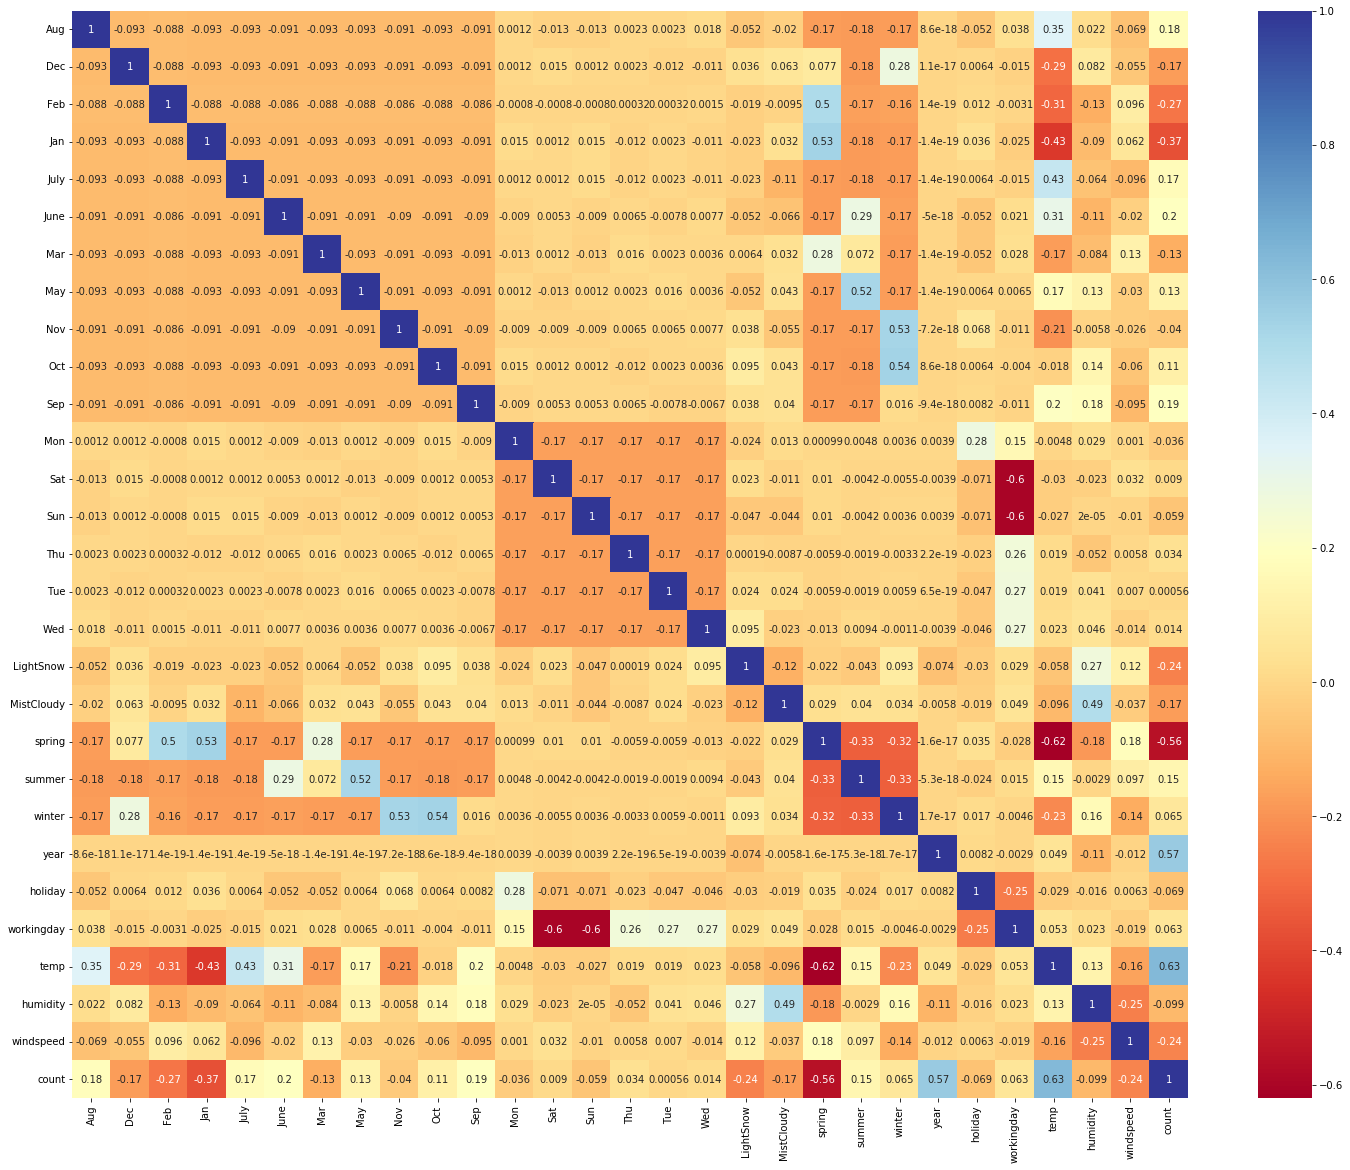

In [520]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='RdYlBu', annot = True)
plt.show()

In [521]:
from sklearn.model_selection import train_test_split

Splitting data into train and test sets in 70:30 ration:

In [522]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [523]:
from sklearn.preprocessing import MinMaxScaler

Using MinMax scaler for scaling numerical columns

In [524]:
scaler = MinMaxScaler()
numeric_vars=['temp','humidity','windspeed','count']
bike_train[numeric_vars] = scaler.fit_transform(bike_train[numeric_vars])
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


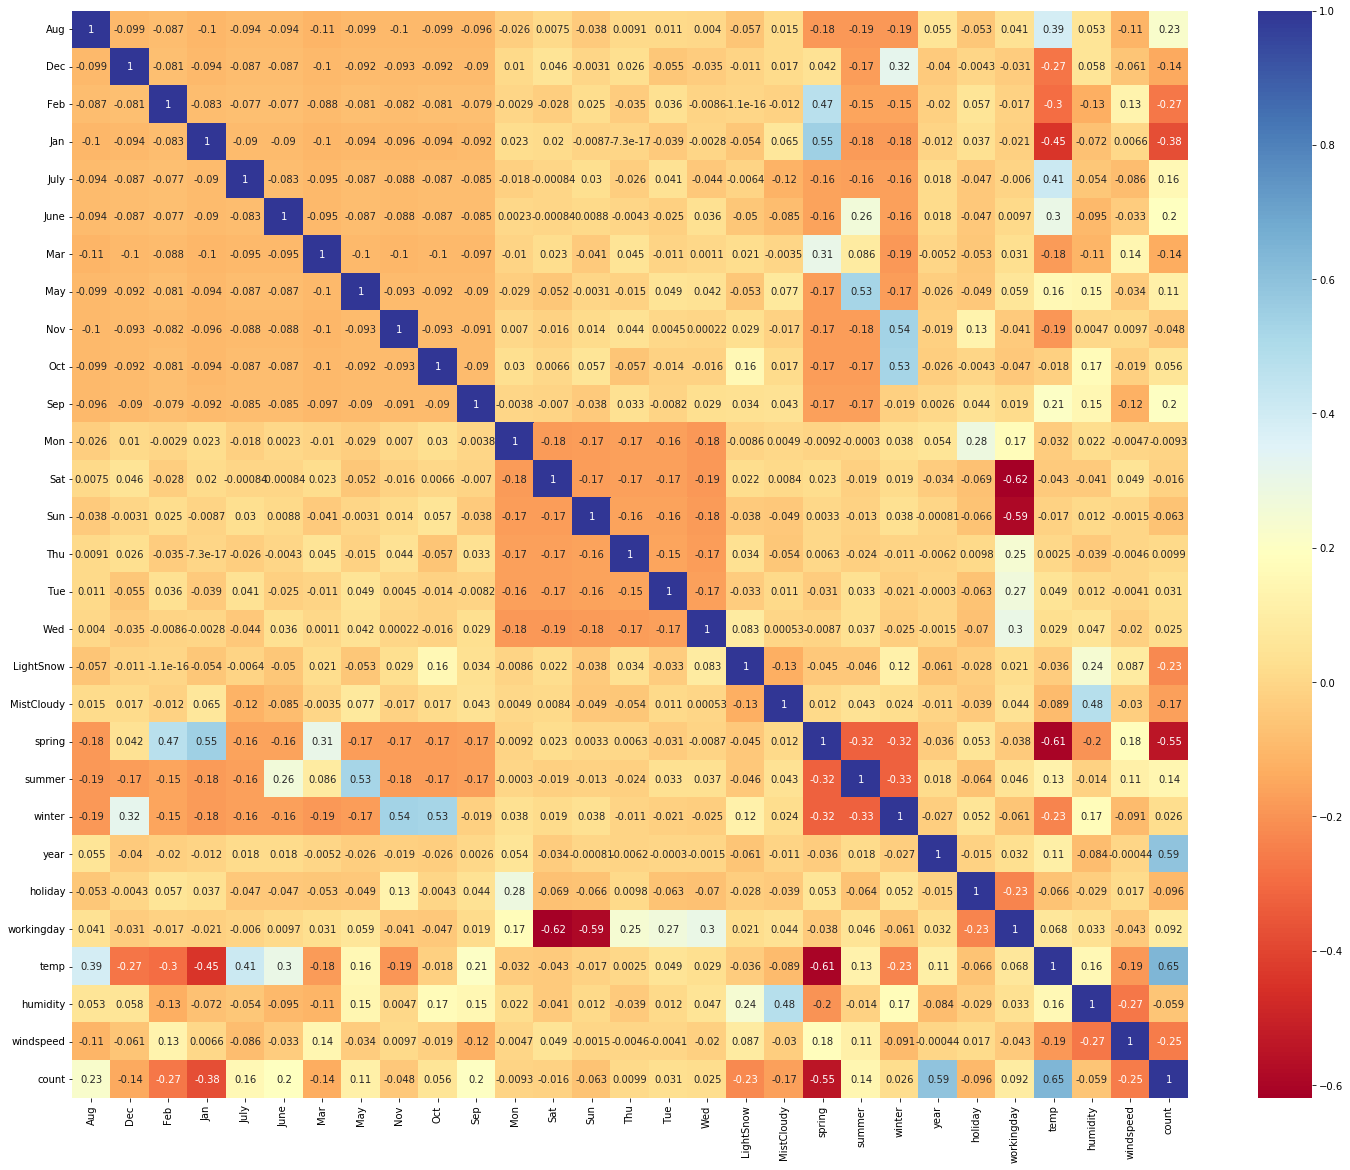

In [525]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(), cmap='RdYlBu', annot = True)
plt.show()

In [526]:
#creating X train and y train
y_train = bike_train.pop('count')
X_train = bike_train

In [527]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Using RFE with 15 predictors to narrow down on most significant predictor columns

In [528]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 10),
 ('LightSnow', True, 1),
 ('MistCloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [529]:
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'LightSnow', 'MistCloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [530]:
X_train_rfe = X_train[col]

In [531]:
import statsmodels.api as sm  

First regression fit to start as reference

In [532]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.22e-191
Time:                        23:58:54   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

Using VIF to find multicollinearity among predictor columns

In [533]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [534]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,MistCloudy,2.29
9,year,2.09
3,Sat,1.98


We can see using model summary that Jan is having high P>|t| value. So we will drop jan and refit the model and generate VIF to further narrow down on required predictors.

In [535]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.11e-191
Time:                        23:58:57   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.0

In [536]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,MistCloudy,2.29
8,year,2.08
2,Sat,1.97


We can see using model summary that holiday is having high P>|t| value. So we will drop holiday and refit the model and generate VIF to further narrow down on required predictors.

In [537]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["holiday"], axis = 1)
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.54e-191
Time:                        23:58:59   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.0

In [538]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,28.38
10,temp,16.88
9,workingday,4.72
12,windspeed,4.70
5,spring,4.18
7,winter,3.39
6,summer,2.84
4,MistCloudy,2.28
8,year,2.08
2,Sat,1.84


We can see using humidity is having high VIF value and so it is dependant other predictors. So we will drop humidity and refit the model and generate VIF to further narrow down on required predictors.

In [539]:
#Drop the humidity column
X_train_new3=X_train_lm2.drop(['humidity'],axis=1)
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.12e-189
Time:                        23:59:01   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

In [540]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,MistCloudy,1.57


We can see using model summary that July is having high P>|t| value(above 0.005). So we will drop July and refit the model and generate VIF to further narrow down on required predictors.

In [541]:
#Drop the humidity column
X_train_new4=X_train_lm3.drop(['July'],axis=1)
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.42e-188
Time:                        23:59:04   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.0

In [542]:
X_train_lm4=X_train_lm4.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.48
8,workingday,4.66
10,windspeed,4.64
4,spring,2.30
7,year,2.07
5,summer,2.00
1,Sat,1.83
6,winter,1.76
3,MistCloudy,1.57
0,Sep,1.23


We can see using model summary that spring is having high P>|t| value(above 0.005). So we will drop spring and refit the model and generate VIF to further narrow down on required predictors.

In [543]:
#Drop the spring column
X_train_new5=X_train_lm4.drop(['spring'],axis=1)
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.13e-188
Time:                        23:59:07   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

In [544]:
X_train_lm5=X_train_lm5.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.76
7,workingday,4.04
9,windspeed,3.44
6,year,2.02
1,Sat,1.69
4,summer,1.57
3,MistCloudy,1.53
5,winter,1.40
0,Sep,1.20
2,LightSnow,1.08


This seems like a valid choice of predictors as VIF for all is less than 5. We will use these predictors for further use.

In [545]:
X_train_lm5=sm.add_constant(X_train_new5)
X_train_new5

,Sep,Sat,LightSnow,MistCloudy,summer,winter,year,workingday,temp,windspeed
576,0,0,0,0,0,0,1,1,0.815169,0.264686
426,0,1,0,1,0,0,1,0,0.442393,0.255342
728,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,1,1,0,1,0,0.395666,0.188475
111,0,0,0,1,1,0,0,1,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,1,1,0.863973,0.187140
53,0,0,0,0,0,0,0,1,0.202618,0.111379
350,0,1,0,1,0,1,0,0,0.248216,0.431816
79,0,0,0,1,1,0,0,1,0.462664,0.529881


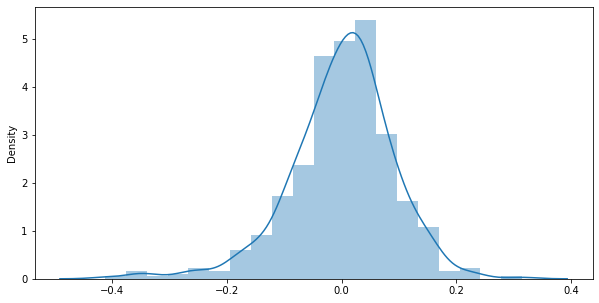

In [546]:
y_train_pred = lm5.predict(X_train_lm5)
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.show()

#####  From the plot above we can see that error distribution for our model on train set has mean close to 0 and error terms are normally distributed.
- R-squared:0.835 i.e. 83% data in train set can be explained using the predictors in our model
- Adj. R-squared:0.832
- F-statistic:253.0- F-statistic value is quite high so we can say its a good model

### Preparing test data set

Using MinMax caler from train data on test set

In [547]:
numeric_vars=['temp','humidity','windspeed','count']
bike_test[numeric_vars] = scaler.transform(bike_test[numeric_vars])
bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [548]:
y_test = bike_test.pop('count')
X_test = bike_test
X_test_new = X_test[X_train_new5.columns]
X_test_new1 = sm.add_constant(X_test_new)
y_pred = lm5.predict(X_test_new1)

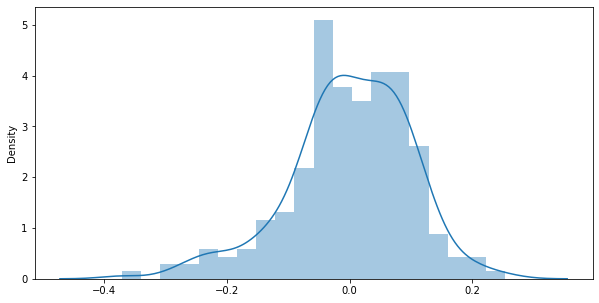

In [549]:
plt.figure(figsize=(10,5))
sns.distplot((y_test - y_pred), bins = 20)
plt.show()

From the plot above we can see the error distribution for our model on test data set has mean close to 0 and error terms are normally distributed.

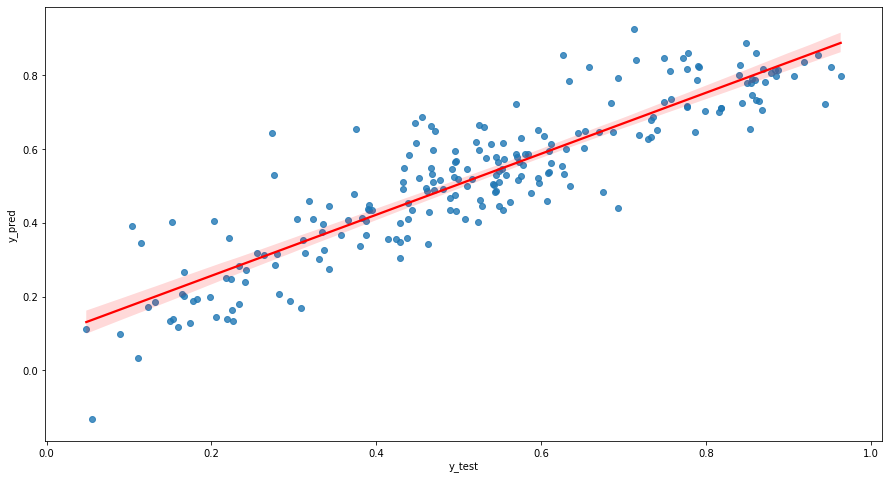

In [550]:
#y_pred vs y_test
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, fit_reg=True,line_kws={"color": "red"})
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [551]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.7961390438459764

r2 score on the test set is 0.7961390438459764.

In [552]:
#finding out the mean squared error 
from sklearn.metrics import mean_squared_error
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008280063298015202
Mean squared error of the test set is 0.009747464738207472


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance in both the test and train datasets

##### Equation of the best fitted line is:
- cnt=0.0974×Sep + 0.0675×Sat - 0.2871×LightSnow - 0.0800×MistCloudy + 0.0886×summer+ 0.1307×winter+ 0.2331×year+ 0.0561×workingday+ 0.5499×temp - 0.1552×windspeed+0.0750

### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1. The R-squared value of the train set is 83% whereas the test set has a value of 79.6% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

2. Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of predictors..